### The aim of this analysis is to infer what variable affects bitcoin price the most, based on the size of coefficients of features which we include in our multiple regression model. The aim is certainly not to predict the bitcoin price, but we want to infer which features are massively associated with bitcoin price, what kind of relationship they have with it, and whether this relationship is simple or more complex (interaction/ploynomial terms)

### To take this time series data and aim to predict bitcoin price with it, a detailed time series analysis will be followed in the future.

### We will now start with the exploratory data analysis.

# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import probplot
import datetime as datetime

In [2]:
df = pd.read_pickle('/Users/harrisasadb/Desktop/jupyter notebooks/crypto regression/Bitcoindata.pk1')
df.drop(df.tail(1).index,inplace=True)
df.tail()

,BTC_Price_USD,Trade_Vol_USD,Difficulty,HashRate,Transaction_Vol,Transactions_per_block,Total_Transactions,Market_Capitalization_USD,NASDAQ-100,S&P 500,Gold & Silver,Oil,Interest_Index
Date,,,,,,,,,,,,,
2022-03-08,38032.50,2.969851e+08,2.755033e+13,2.026911e+08,101263.905069,1728.182432,409089.188215,7.317727e+11,1908.599976,4170.700195,159.080002,123.699997,17.38
2022-03-09,38753.10,2.790929e+08,2.755033e+13,1.889958e+08,150181.876330,1976.847826,469664.532772,7.975872e+11,1960.930054,4277.879883,157.539993,108.699997,20.46
2022-03-10,41956.53,4.096770e+08,2.755033e+13,1.985825e+08,122390.433409,1803.813793,462278.059192,7.522241e+11,1951.520020,4259.520020,160.630005,106.019997,18.92
2022-03-11,39437.89,3.600285e+08,2.755033e+13,1.889958e+08,134710.864322,1828.862319,434537.675717,7.375494e+11,1925.349976,4204.310059,158.720001,109.330002,16.72
2022-03-12,38741.04,2.679113e+08,2.755033e+13,2.136474e+08,36313.202224,1443.256410,308297.983710,7.419112e+11,1925.349976,4204.310059,158.720001,109.330002,14.08


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4818 entries, 2009-01-02 to 2022-03-12
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   BTC_Price_USD              4818 non-null   float64
 1   Trade_Vol_USD              4818 non-null   float64
 2   Difficulty                 4818 non-null   float64
 3   HashRate                   4818 non-null   float64
 4   Transaction_Vol            4818 non-null   float64
 5   Transactions_per_block     4818 non-null   float64
 6   Total_Transactions         4818 non-null   float64
 7   Market_Capitalization_USD  4818 non-null   float64
 8   NASDAQ-100                 4818 non-null   float64
 9   S&P 500                    4818 non-null   float64
 10  Gold & Silver              4818 non-null   float64
 11  Oil                        4818 non-null   float64
 12  Interest_Index             4818 non-null   float64
dtypes: float64(13)
memory usage: 5

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BTC_Price_USD,4818.0,6.584577e+03,1.347005e+04,0.000000,8.970000e+00,4.529500e+02,7.173838e+03,6.756217e+04
Trade_Vol_USD,4818.0,1.536501e+08,3.291482e+08,0.000000,2.243202e+05,8.533231e+06,1.714632e+08,5.352016e+09
Difficulty,4818.0,4.330620e+12,7.318014e+12,0.000000,1.728227e+06,5.269984e+10,6.071846e+12,2.796715e+13
HashRate,4818.0,3.134696e+07,5.296497e+07,0.000000,1.244874e+01,3.924647e+05,4.407615e+07,2.481103e+08
Transaction_Vol,4818.0,1.673635e+05,2.121996e+05,0.000000,7.566801e+04,1.410869e+05,2.239629e+05,5.313161e+06
Transactions_per_block,4818.0,1.005945e+03,8.681441e+02,1.000000,6.725000e+01,8.506548e+02,1.840460e+03,2.762541e+03
Total_Transactions,4818.0,4.990801e+05,1.521458e+06,0.000000,1.317835e+02,1.023484e+04,3.020706e+05,2.128565e+07
Market_Capitalization_USD,4818.0,1.207286e+11,2.530919e+11,0.000000,7.051221e+07,6.573016e+09,1.263802e+11,1.277658e+12
NASDAQ-100,4818.0,9.856351e+02,4.369496e+02,322.130005,6.177650e+02,9.107800e+02,1.229315e+03,2.219440e+03
S&P 500,4818.0,2.192555e+03,9.584647e+02,676.530029,1.357740e+03,2.058795e+03,2.779735e+03,4.796560e+03


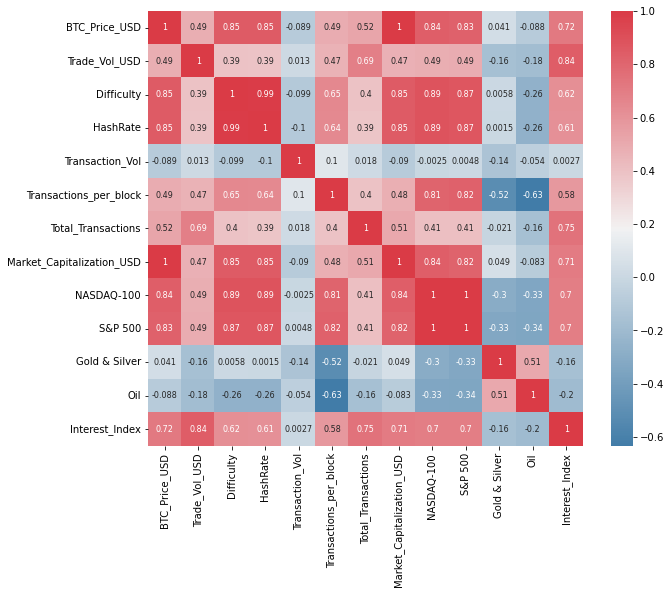

In [5]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax, annot=True,annot_kws={"fontsize":8})

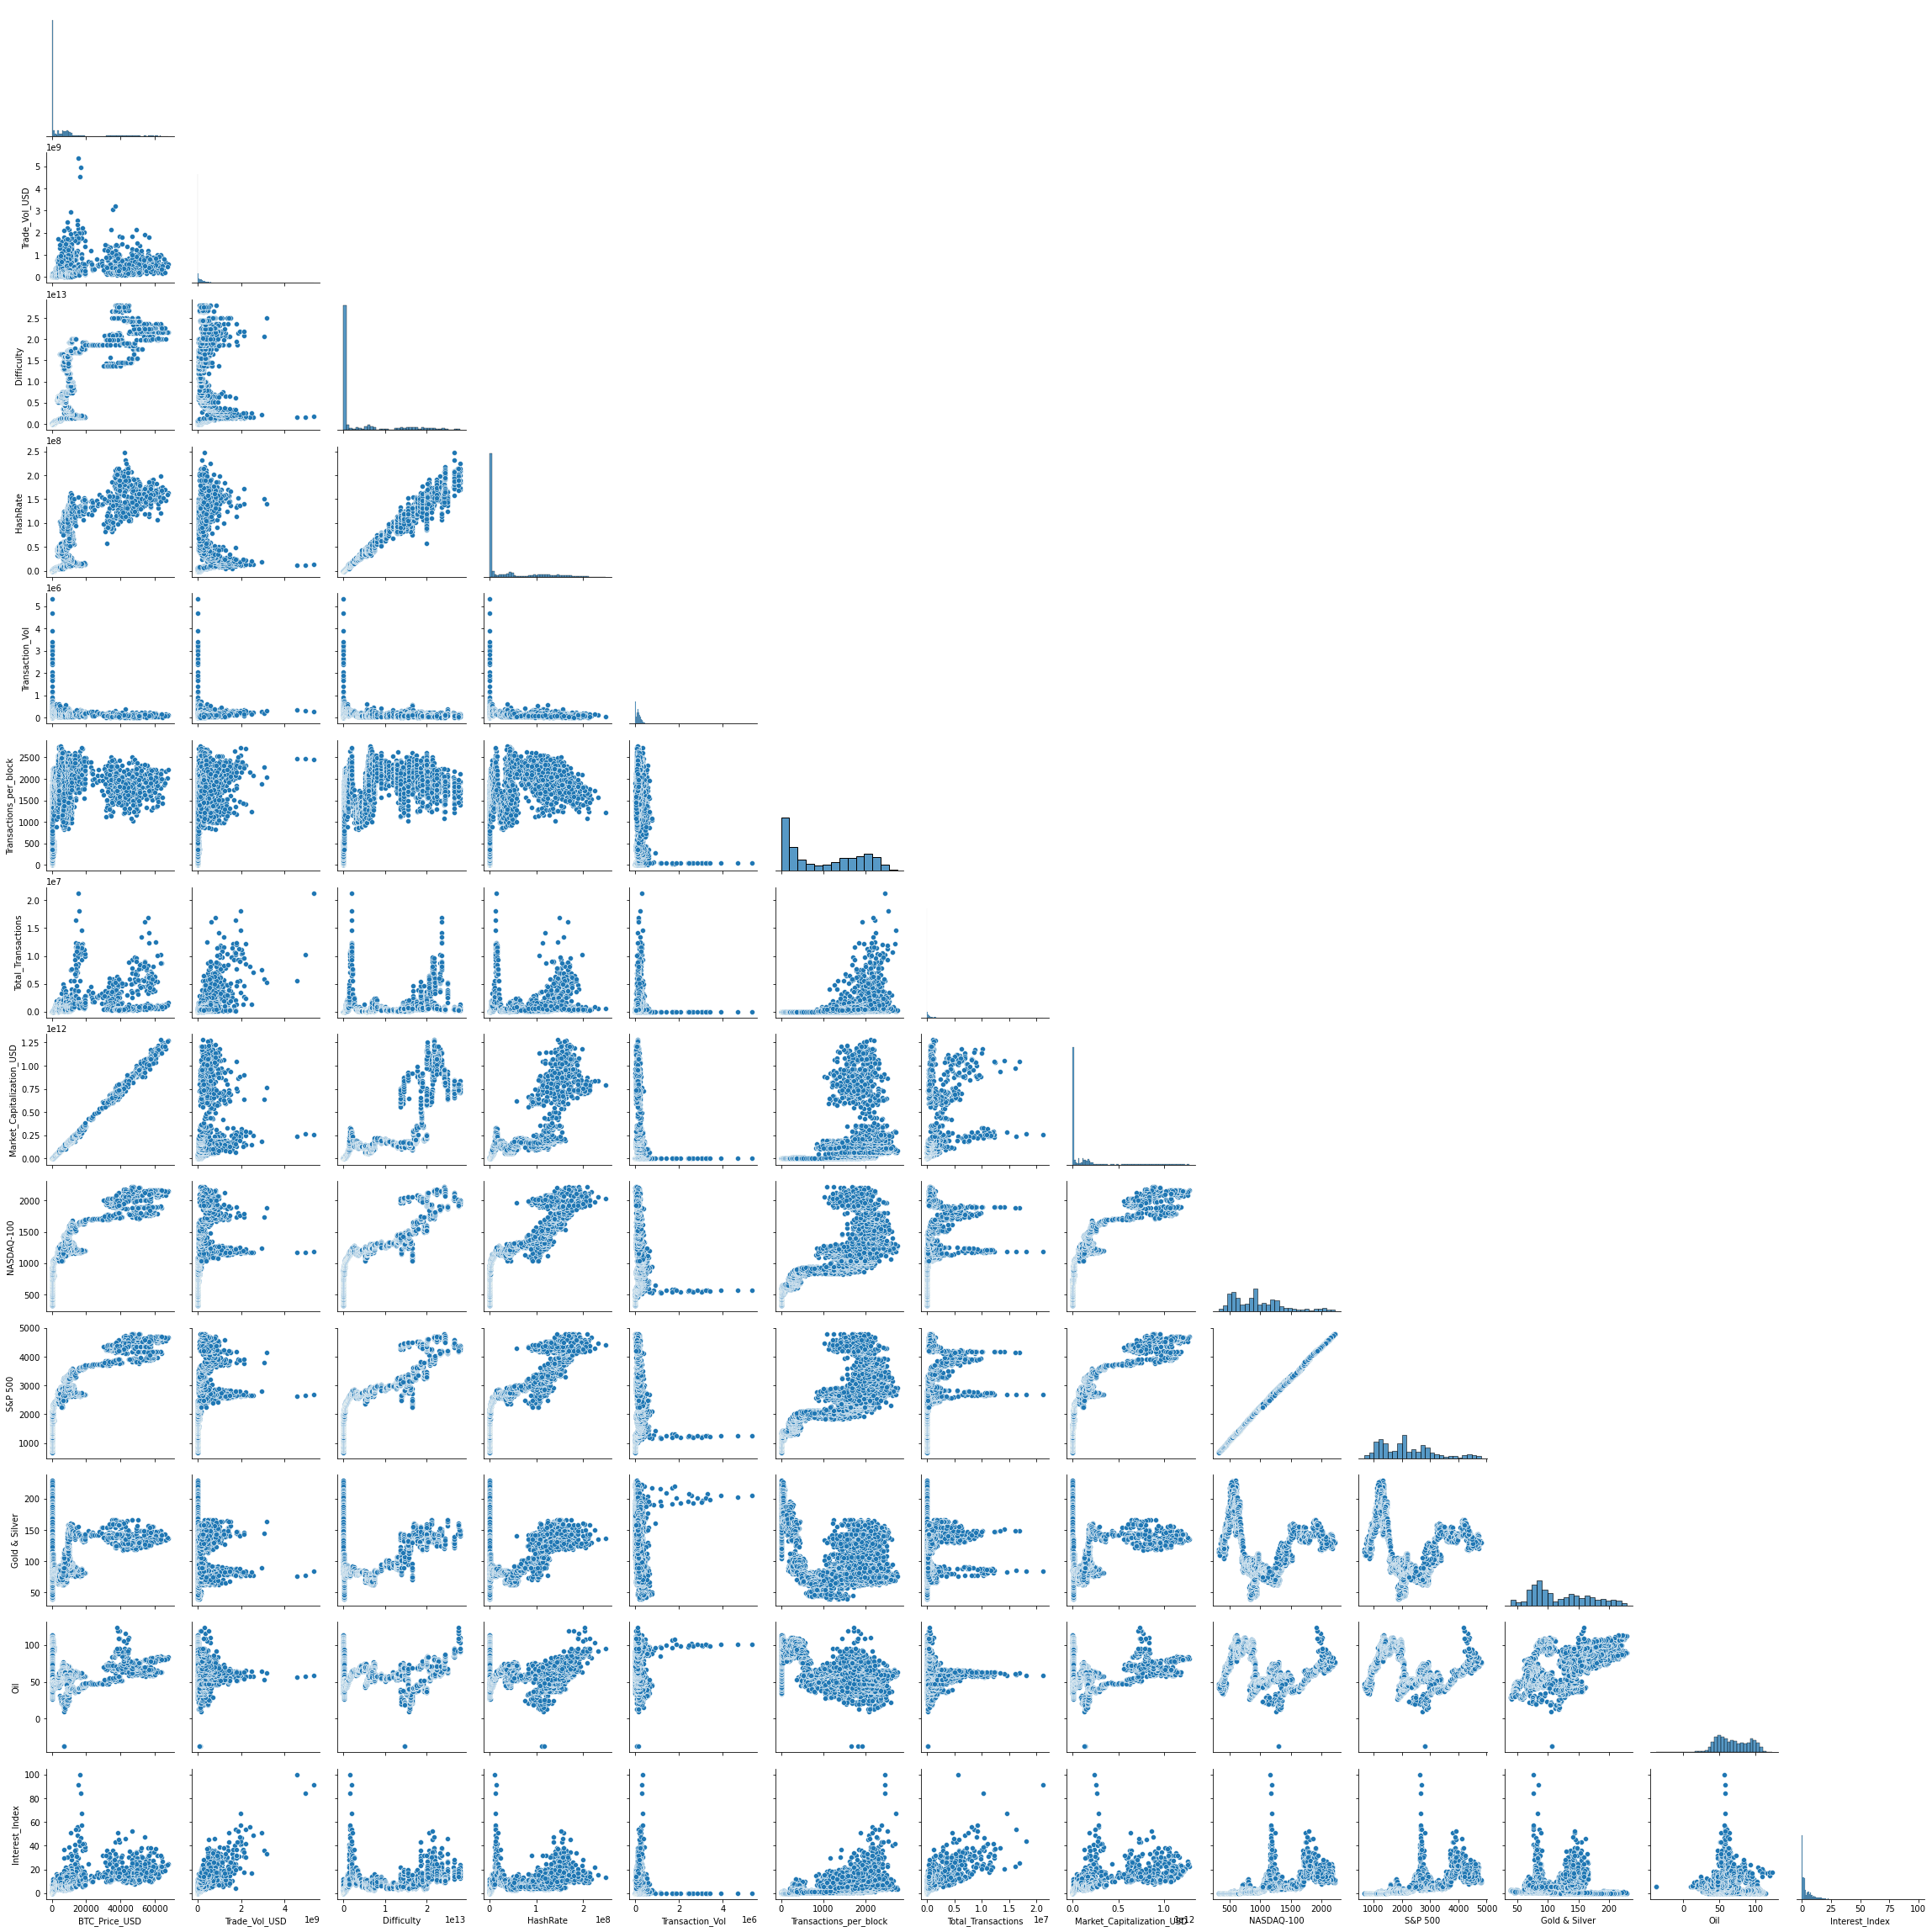

In [6]:
pairplot = sns.pairplot(df,corner = True)

In [7]:
df.corr().sort_values('BTC_Price_USD')

,BTC_Price_USD,Trade_Vol_USD,Difficulty,HashRate,Transaction_Vol,Transactions_per_block,Total_Transactions,Market_Capitalization_USD,NASDAQ-100,S&P 500,Gold & Silver,Oil,Interest_Index
Transaction_Vol,-0.089248,0.012729,-0.099422,-0.100267,1.000000,0.104460,0.017774,-0.090218,-0.002500,0.004779,-0.137278,-0.054439,0.002680
Oil,-0.088004,-0.183344,-0.260160,-0.259427,-0.054439,-0.633689,-0.162666,-0.083223,-0.334728,-0.342452,0.513723,1.000000,-0.196151
Gold & Silver,0.041140,-0.161730,0.005766,0.001475,-0.137278,-0.517121,-0.020564,0.049428,-0.301508,-0.329742,1.000000,0.513723,-0.163555
Trade_Vol_USD,0.487184,1.000000,0.394765,0.388491,0.012729,0.467846,0.691354,0.474216,0.488531,0.494373,-0.161730,-0.183344,0.844302
Transactions_per_block,0.491046,0.467846,0.654463,0.644257,0.104460,1.000000,0.396369,0.482418,0.809268,0.822110,-0.517121,-0.633689,0.582187
Total_Transactions,0.522150,0.691354,0.396099,0.385817,0.017774,0.396369,1.000000,0.512311,0.411982,0.411245,-0.020564,-0.162666,0.749885
Interest_Index,0.718259,0.844302,0.617580,0.612487,0.002680,0.582187,0.749885,0.707647,0.696863,0.697758,-0.163555,-0.196151,1.000000
S&P 500,0.825808,0.494373,0.874821,0.873101,0.004779,0.822110,0.411245,0.820881,0.999002,1.000000,-0.329742,-0.342452,0.697758
NASDAQ-100,0.840191,0.488531,0.889896,0.887925,-0.002500,0.809268,0.411982,0.835805,1.000000,0.999002,-0.301508,-0.334728,0.696863
HashRate,0.850442,0.388491,0.990889,1.000000,-0.100267,0.644257,0.385817,0.850038,0.887925,0.873101,0.001475,-0.259427,0.612487


**It looks like BTC closing price is highly correlated with NASDAQ-100 and S&P-500 composite index, more so with the former. So performance of technology stocks highly impacts BTC price. It also looks like prices of other commodities like gold, silver and oil are not much correlated with BTC price, which might indicate why S&P-500 index is weakly correlated with BTC price than with NASDAQ-100.**

**The plot above also indicates that the difficulty of mining a block, and the hashrate is highly correlated with BTC price. The google interest index is also highly correlated. Lets see with more analysis what we find**

Text(747.2117647058824, 0.5, 'S&P-500')

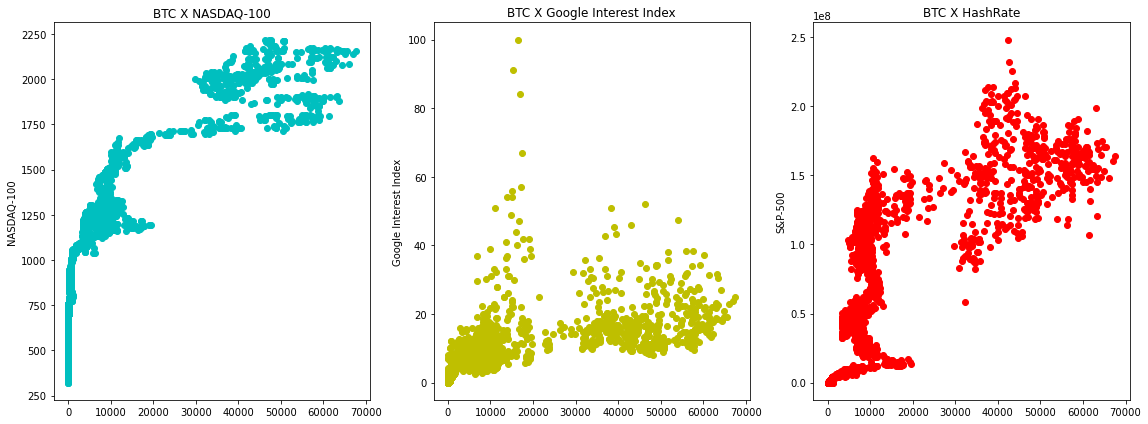

In [8]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['BTC_Price_USD'],df['NASDAQ-100'],'o',color = 'c' )
axes[0].set_ylabel("NASDAQ-100")
axes[0].set_title("BTC X NASDAQ-100")

axes[1].plot(df['BTC_Price_USD'],df['Interest_Index'],'o',color = 'y')
axes[1].set_title("BTC X Google Interest Index");
axes[1].set_ylabel("Google Interest Index")
plt.tight_layout();

axes[2].plot(df['BTC_Price_USD'],df['HashRate'],'o',color = 'r')
axes[2].set_title("BTC X HashRate")
axes[2].set_ylabel("S&P-500")


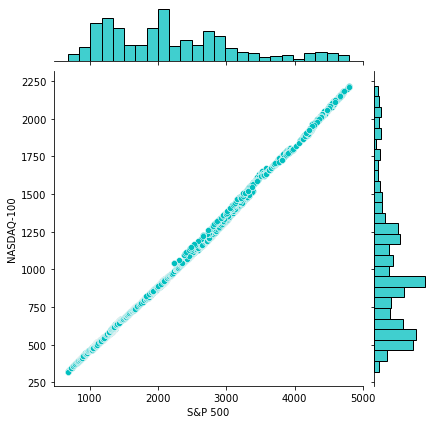

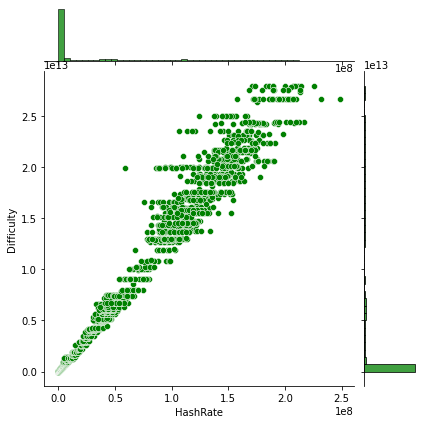

In [10]:
sns.jointplot(x='S&P 500',y='NASDAQ-100',data=df,color = 'c')
sns.jointplot(x='HashRate',y='Difficulty',data=df,color = 'g')

Text(0, 0.5, 'BTC Price ($)')

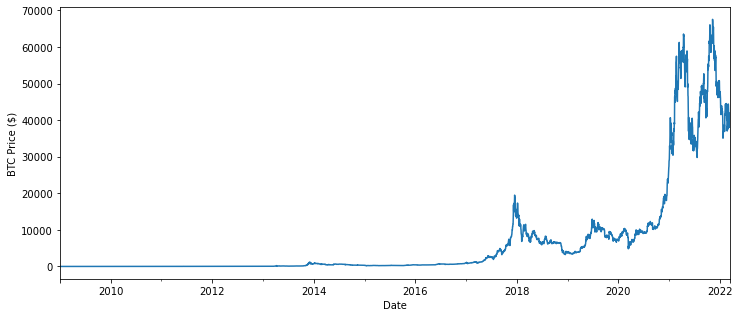

In [11]:
# the above two plots show that we will face multicollinearity problem when doing a regression model
plt.figure(figsize=(12,5))
df['BTC_Price_USD'].plot()
plt.ylabel('BTC Price ($)')

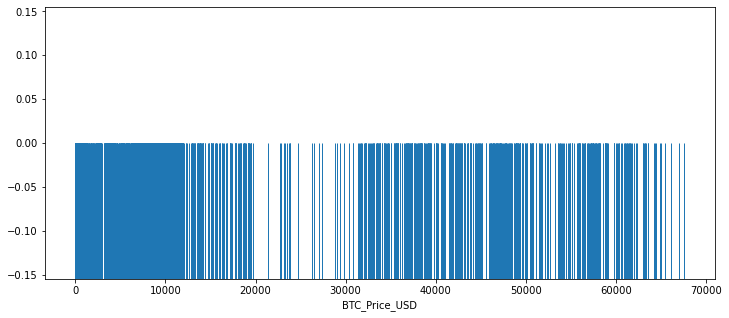

In [12]:
plt.figure(figsize=(12,5))
sns.rugplot(x='BTC_Price_USD',data=df,height=0.5)

<Figure size 1600x800 with 0 Axes>

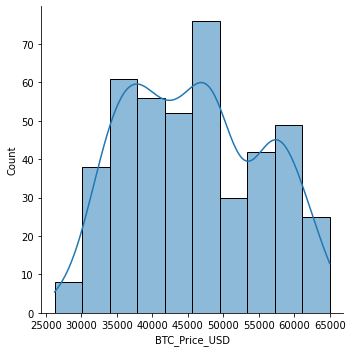

In [13]:
#so for most of the last decade, price has been below 10000
plt.figure(figsize=(8,4),dpi=200)
sns.displot(data=df[(df['BTC_Price_USD']>25000) & (df['BTC_Price_USD']<65000)],x='BTC_Price_USD', kde = True)

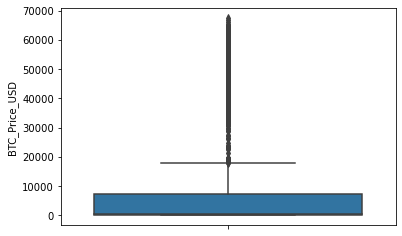

In [14]:
#So for the last year BTC has more counts b/w 45000 to 50000
sns.boxplot(y='BTC_Price_USD',data=df)
#This is expected, bitcoin reaching new ATH in the last couple of years is a new phenomenon.

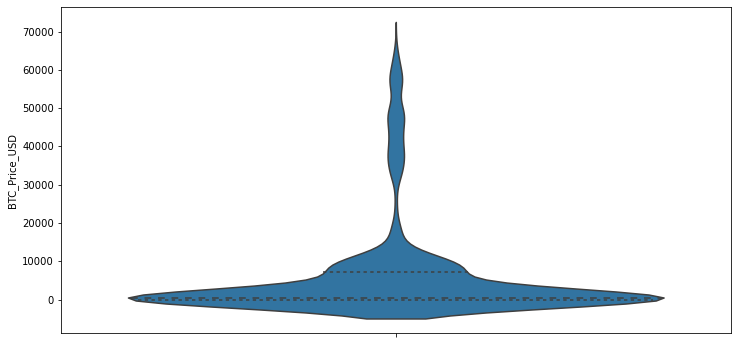

In [15]:
plt.figure(figsize=(12,6))
sns.violinplot(y='BTC_Price_USD',data=df,inner = 'quartile')
#for most of the last decade, BTC price has been been closer to around 0-500$

**Things might have changed after bitcoin gained massive attention upon reaching new ATH in 2018. It must have 
formed new correlations after this period when it received massive media attention. Lets see when its attention 
peaked first time, then take the dataset from this point onwards when people started taking it a bit seriously**

Text(0, 0.5, 'Google interest Index')

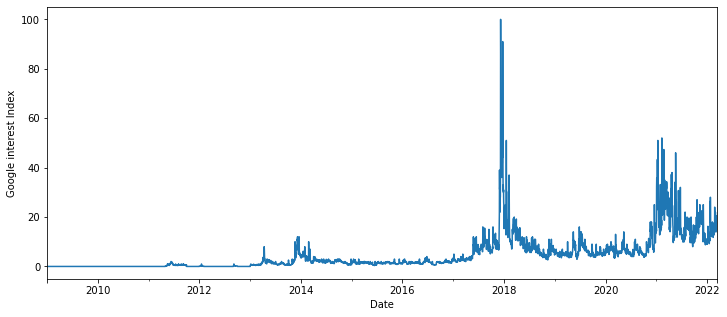

In [16]:
plt.figure(figsize=(12,5))
df['Interest_Index'].plot()
plt.ylabel('Google interest Index')

In [17]:
#So close to early 2018, it received massive interest online (in media too), that's when BTC was close to 10,000$
dfnew = df.loc['2017-12-01':'2022-03-12'] #new range
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1563 entries, 2017-12-01 to 2022-03-12
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   BTC_Price_USD              1563 non-null   float64
 1   Trade_Vol_USD              1563 non-null   float64
 2   Difficulty                 1563 non-null   float64
 3   HashRate                   1563 non-null   float64
 4   Transaction_Vol            1563 non-null   float64
 5   Transactions_per_block     1563 non-null   float64
 6   Total_Transactions         1563 non-null   float64
 7   Market_Capitalization_USD  1563 non-null   float64
 8   NASDAQ-100                 1563 non-null   float64
 9   S&P 500                    1563 non-null   float64
 10  Gold & Silver              1563 non-null   float64
 11  Oil                        1563 non-null   float64
 12  Interest_Index             1563 non-null   float64
dtypes: float64(13)
memory usage: 1

In [18]:
dfnew.corr().sort_values('BTC_Price_USD')

,BTC_Price_USD,Trade_Vol_USD,Difficulty,HashRate,Transaction_Vol,Transactions_per_block,Total_Transactions,Market_Capitalization_USD,NASDAQ-100,S&P 500,Gold & Silver,Oil,Interest_Index
Transaction_Vol,-0.213288,0.323416,-0.167588,-0.179130,1.000000,0.405722,0.270779,-0.218547,-0.258655,-0.265991,-0.122289,-0.266940,0.237788
Transactions_per_block,-0.092465,-0.091262,0.187227,0.117223,0.405722,1.000000,0.210845,-0.087831,-0.036810,-0.047353,0.102512,-0.380936,0.008976
Trade_Vol_USD,0.185346,1.000000,-0.165076,-0.178652,0.323416,-0.091262,0.609693,0.172381,-0.023073,-0.014493,-0.010489,0.153134,0.775439
Total_Transactions,0.375082,0.609693,0.131036,0.110634,0.270779,0.210845,1.000000,0.363353,0.156659,0.159424,0.269824,0.008674,0.718730
Oil,0.469682,0.153134,0.091770,0.095801,-0.266940,-0.380936,0.008674,0.466221,0.416940,0.451862,0.010397,1.000000,0.254552
Interest_Index,0.525463,0.775439,0.193555,0.180697,0.237788,0.008976,0.718730,0.514015,0.329045,0.336683,0.302388,0.254552,1.000000
Gold & Silver,0.682006,-0.010489,0.863120,0.841467,-0.122289,0.102512,0.269824,0.686322,0.806845,0.788488,1.000000,0.010397,0.302388
HashRate,0.729066,-0.178652,0.970299,1.000000,-0.179130,0.117223,0.110634,0.737759,0.842504,0.827283,0.841467,0.095801,0.180697
Difficulty,0.730409,-0.165076,1.000000,0.970299,-0.167588,0.187227,0.131036,0.738718,0.851068,0.835208,0.863120,0.091770,0.193555
NASDAQ-100,0.900667,-0.023073,0.851068,0.842504,-0.258655,-0.036810,0.156659,0.905724,1.000000,0.998457,0.806845,0.416940,0.329045


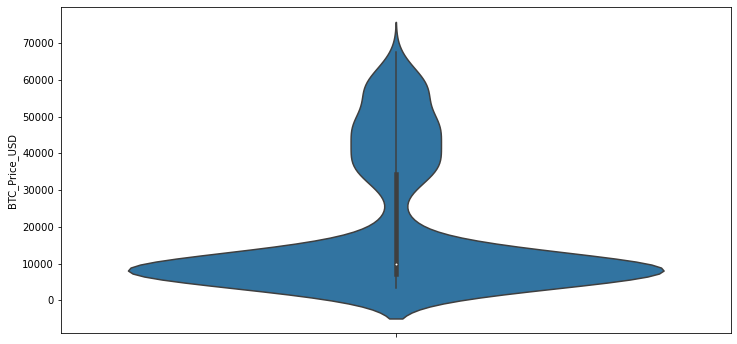

In [19]:
#Interesting, stock indexes of course have strong correltion, but now gold and silver too are slightly correlated
plt.figure(figsize=(12,6))
sns.violinplot(y='BTC_Price_USD',data=dfnew,inner = 'box')

In [20]:
dfnew.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BTC_Price_USD,1563.0,1.930135e+04,1.781885e+04,3.242420e+03,7.249500e+03,9.769790e+03,3.425349e+04,6.756217e+04
Trade_Vol_USD,1563.0,4.161506e+08,4.530584e+08,2.536850e+07,1.474306e+08,2.738783e+08,5.080631e+08,5.352016e+09
Difficulty,1563.0,1.312378e+13,7.106360e+12,1.347001e+12,6.379414e+12,1.373235e+13,1.914648e+13,2.796715e+13
HashRate,1563.0,9.493268e+07,5.152909e+07,1.078053e+07,4.601807e+07,9.800460e+07,1.345707e+08,2.481103e+08
Transaction_Vol,1563.0,1.353154e+05,6.503951e+04,0.000000e+00,9.271373e+04,1.273230e+05,1.637757e+05,6.326632e+05
Transactions_per_block,1563.0,1.930274e+03,3.948174e+02,8.341296e+02,1.662124e+03,1.996297e+03,2.228961e+03,2.762541e+03
Total_Transactions,1563.0,1.359951e+06,2.410187e+06,4.154115e+04,1.916688e+05,4.675108e+05,1.123524e+06,2.128565e+07
Market_Capitalization_USD,1563.0,3.565636e+11,3.383178e+11,5.620096e+10,1.290013e+11,1.761910e+11,6.369293e+11,1.277658e+12
NASDAQ-100,1563.0,1.502842e+03,3.257573e+02,1.040000e+03,1.236610e+03,1.363030e+03,1.768330e+03,2.219440e+03
S&P 500,1563.0,3.327310e+03,6.710696e+02,2.237400e+03,2.791950e+03,3.025860e+03,3.875970e+03,4.796560e+03


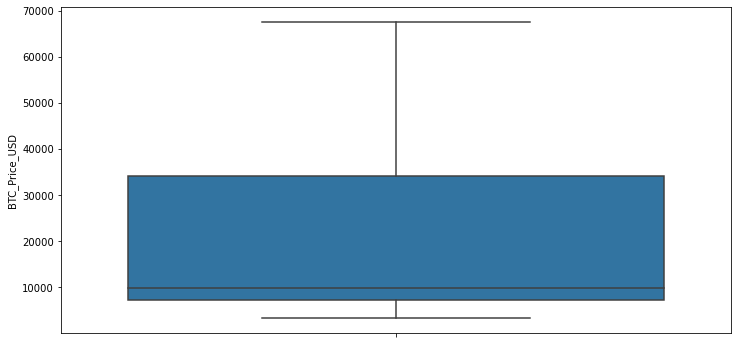

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot(y='BTC_Price_USD',data=dfnew)# much more reasonable

Text(0.5, 1.0, 'Hash Rate VS BTC Price')

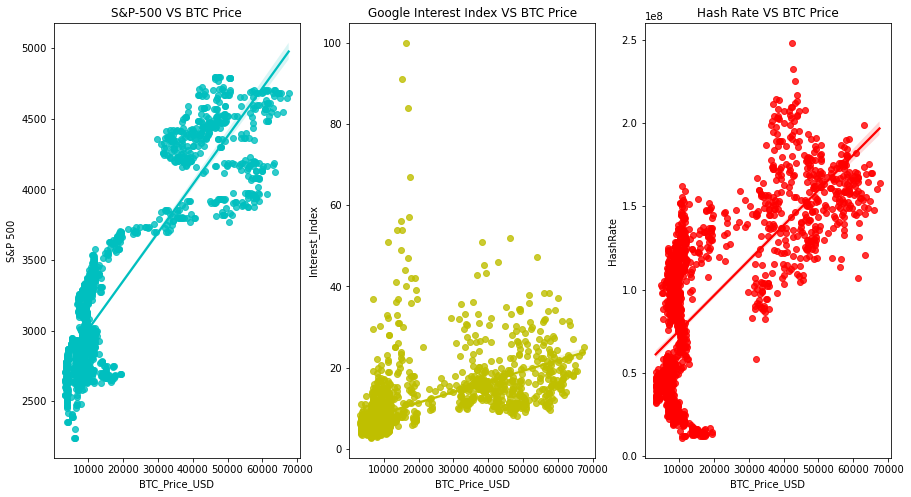

In [22]:
# Due to high correlation lets do a quick regression plot with our prior three correlated features for full dataset
fig, axs = plt.subplots(ncols=3,figsize=(15,8))

sns.regplot(x='BTC_Price_USD',y='S&P 500',data=dfnew, color = 'c', ax = axs[0])
axs[0].set_title('S&P-500 VS BTC Price')

sns.regplot(x='BTC_Price_USD',y='Interest_Index',data=dfnew, color = 'y',ax = axs[1])
axs[1].set_title('Google Interest Index VS BTC Price')

sns.regplot(x='BTC_Price_USD',y='HashRate',data=dfnew, color = 'r',ax = axs[2])
axs[2].set_title('Hash Rate VS BTC Price')

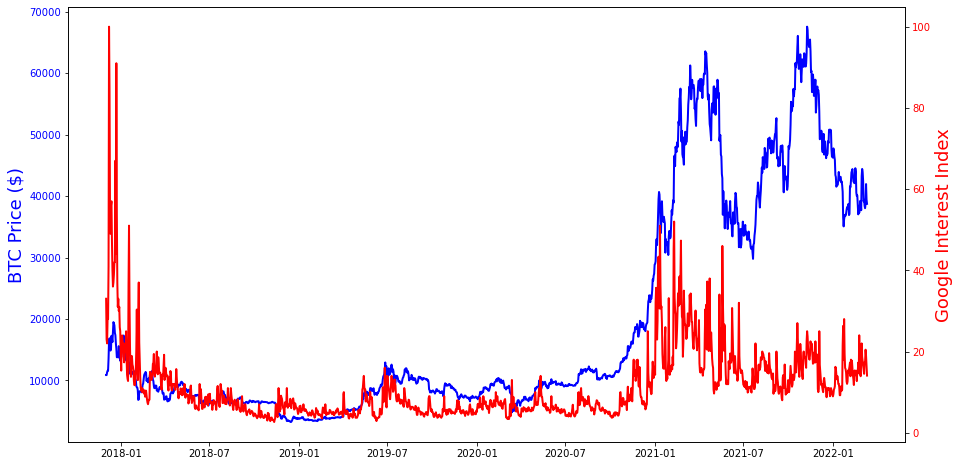

In [23]:
fig, ax1 = plt.subplots(figsize=(15,8))

ax1.plot(dfnew.index, dfnew['BTC_Price_USD'], lw=2, color="blue")
ax1.set_ylabel(r"BTC Price ($)", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(dfnew.index, dfnew['Interest_Index'], lw=2, color="red")
ax2.set_ylabel(r"Google Interest Index", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

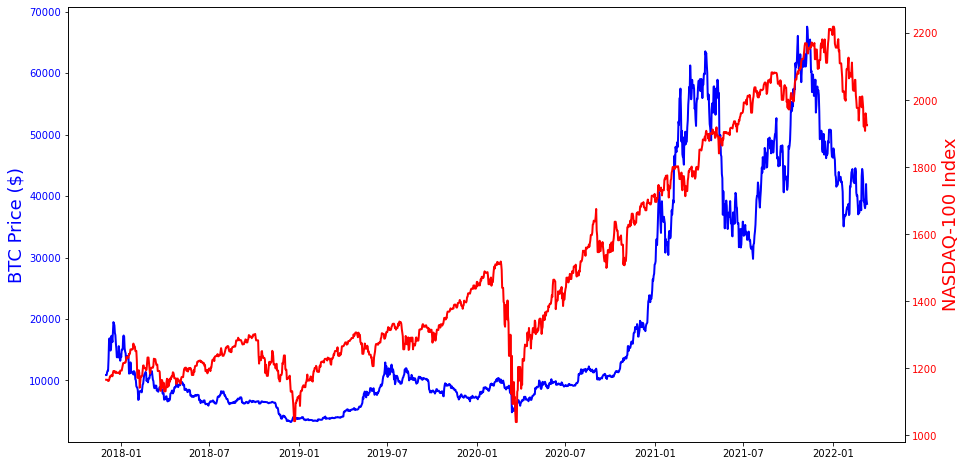

In [24]:
fig, ax1 = plt.subplots(figsize=(15,8))

ax1.plot(dfnew.index, dfnew['BTC_Price_USD'], lw=2, color="blue")
ax1.set_ylabel(r"BTC Price ($)", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(dfnew.index, dfnew['NASDAQ-100'], lw=2, color="red")
ax2.set_ylabel(r"NASDAQ-100 Index", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

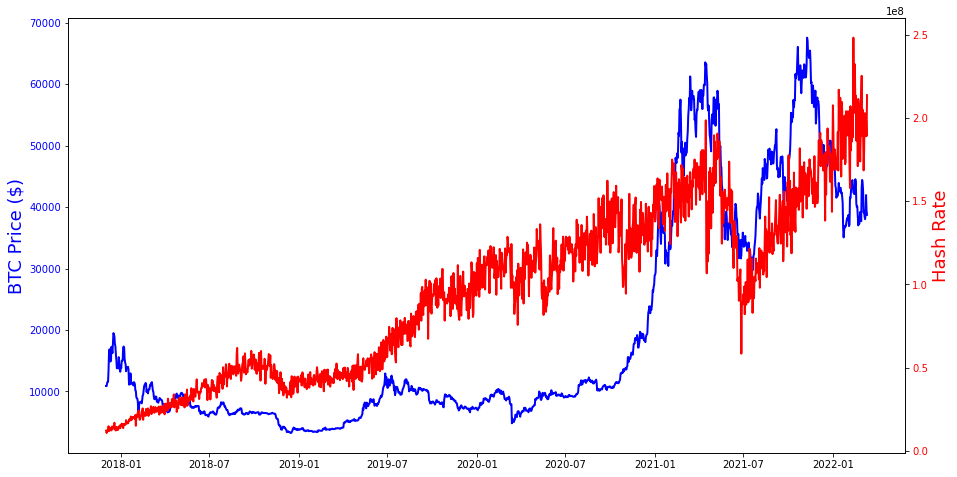

In [25]:
fig, ax1 = plt.subplots(figsize=(15,8))

ax1.plot(dfnew.index, dfnew['BTC_Price_USD'], lw=2, color="blue")
ax1.set_ylabel(r"BTC Price ($)", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(dfnew.index, dfnew['HashRate'], lw=2, color="red")
ax2.set_ylabel(r"Hash Rate", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

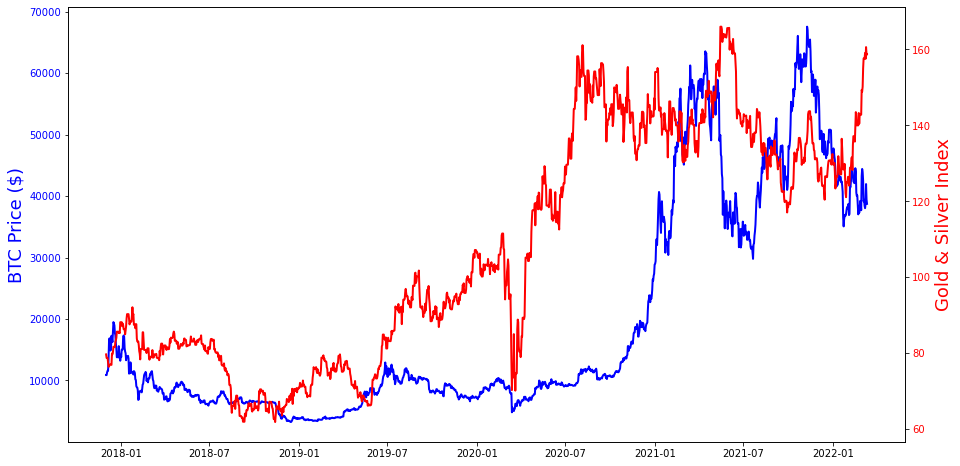

In [26]:
fig, ax1 = plt.subplots(figsize=(15,8))

ax1.plot(dfnew.index, dfnew['BTC_Price_USD'], lw=2, color="blue")
ax1.set_ylabel(r"BTC Price ($)", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(dfnew.index, dfnew['Gold & Silver'], lw=2, color="red")
ax2.set_ylabel(r"Gold & Silver Index", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

# Multiple Regression Modelling with Statsmodel

In [27]:
Y = dfnew['BTC_Price_USD']
X = dfnew.drop('BTC_Price_USD',axis =1 )
X = sm.add_constant(X) 
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          BTC_Price_USD   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 5.204e+04
Date:                Wed, 30 Mar 2022   Prob (F-statistic):               0.00
Time:                        00:12:31   Log-Likelihood:                -12826.
No. Observations:                1563   AIC:                         2.568e+04
Df Residuals:                    1550   BIC:                         2.575e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

((array([-3.32419304, -3.06835488, -2.92616396, ...,  2.92616396,
          3.06835488,  3.32419304]),
  array([-4942.7608932 , -4535.16195082, -4486.70799363, ...,
          5295.59259079,  5888.19483021,  6262.08141588])),
 (784.3398428599199, 3.3530278177197354e-10, 0.8832342344632788))

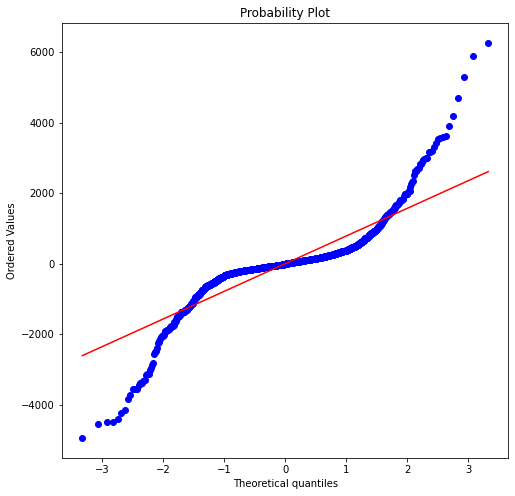

In [28]:
#high multicollinearity, lets see if regression assumptions hold
predicted_value = model.predict()
residuals = dfnew['BTC_Price_USD']-predicted_value

plt.figure(figsize=(8,8))
probplot(residuals, plot=plt)

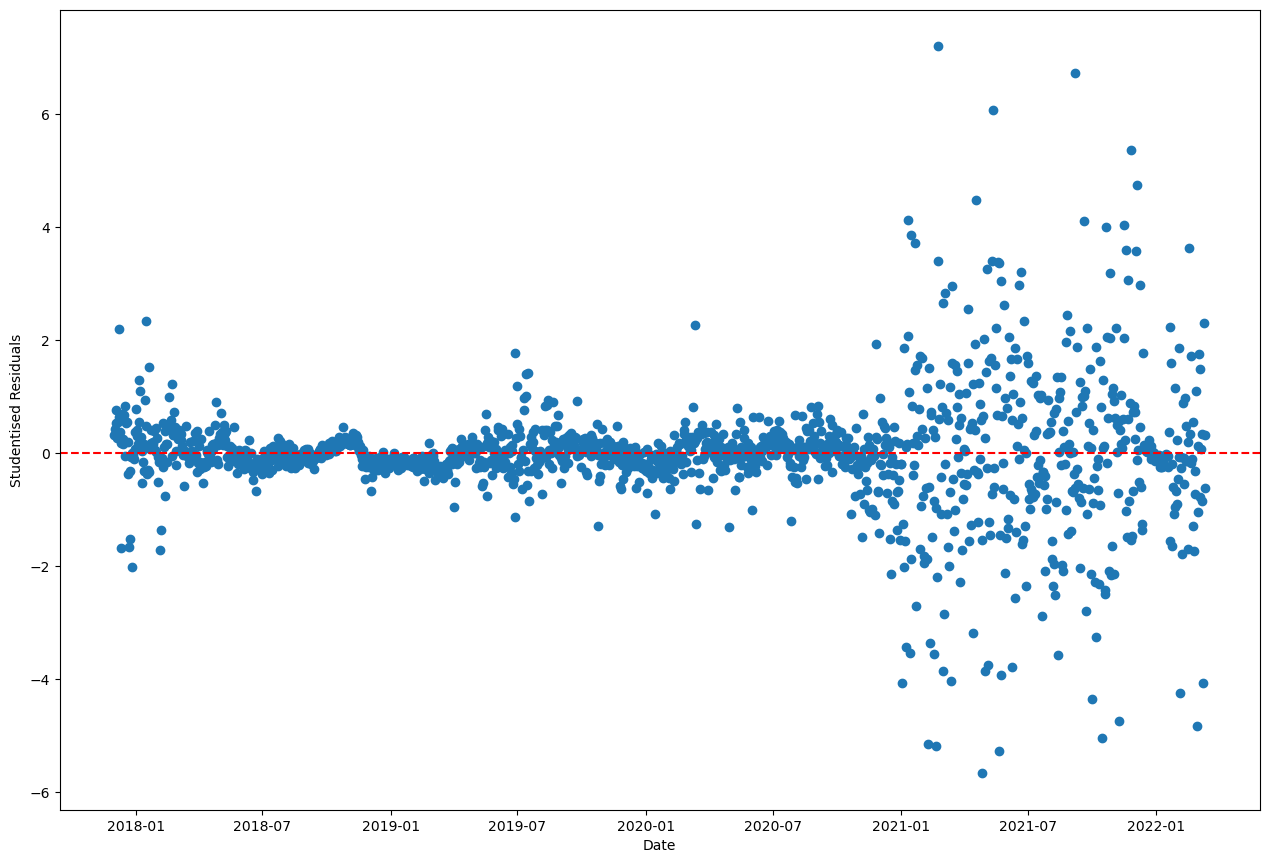

In [29]:
#checking studendized residuals
stud_res = model.outlier_test()
fig = plt.figure(figsize=(12,8),dpi=100)

axes1 = fig.add_axes([0, 0, 1, 1])

plt.scatter(stud_res.index, stud_res['student_resid'])
plt.xlabel("Date")
plt.ylabel("Studentised Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


In [30]:
#standardize the data to see if any changes occur
normalized_dfnew=(dfnew-dfnew.mean())/dfnew.std()
Y = normalized_dfnew['BTC_Price_USD']
X = normalized_dfnew.drop('BTC_Price_USD',axis =1 )
X = sm.add_constant(X) 
model = sm.OLS(Y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          BTC_Price_USD   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 5.204e+04
Date:                Wed, 30 Mar 2022   Prob (F-statistic):               0.00
Time:                        00:12:35   Log-Likelihood:                 2472.6
No. Observations:                1563   AIC:                            -4919.
Df Residuals:                    1550   BIC:                            -4850.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**multicollinearity should be negated by doing regularization (L1 OR L2) with scikitlearn later. Durbin-watson value is surprisingly showing low autocorrelation, maybe because BTC price is so volatile that lagging behind one day changes the value by a lot. Let us test more for autocorrelation with a plot, and first converting the time series dataframe to stationary**

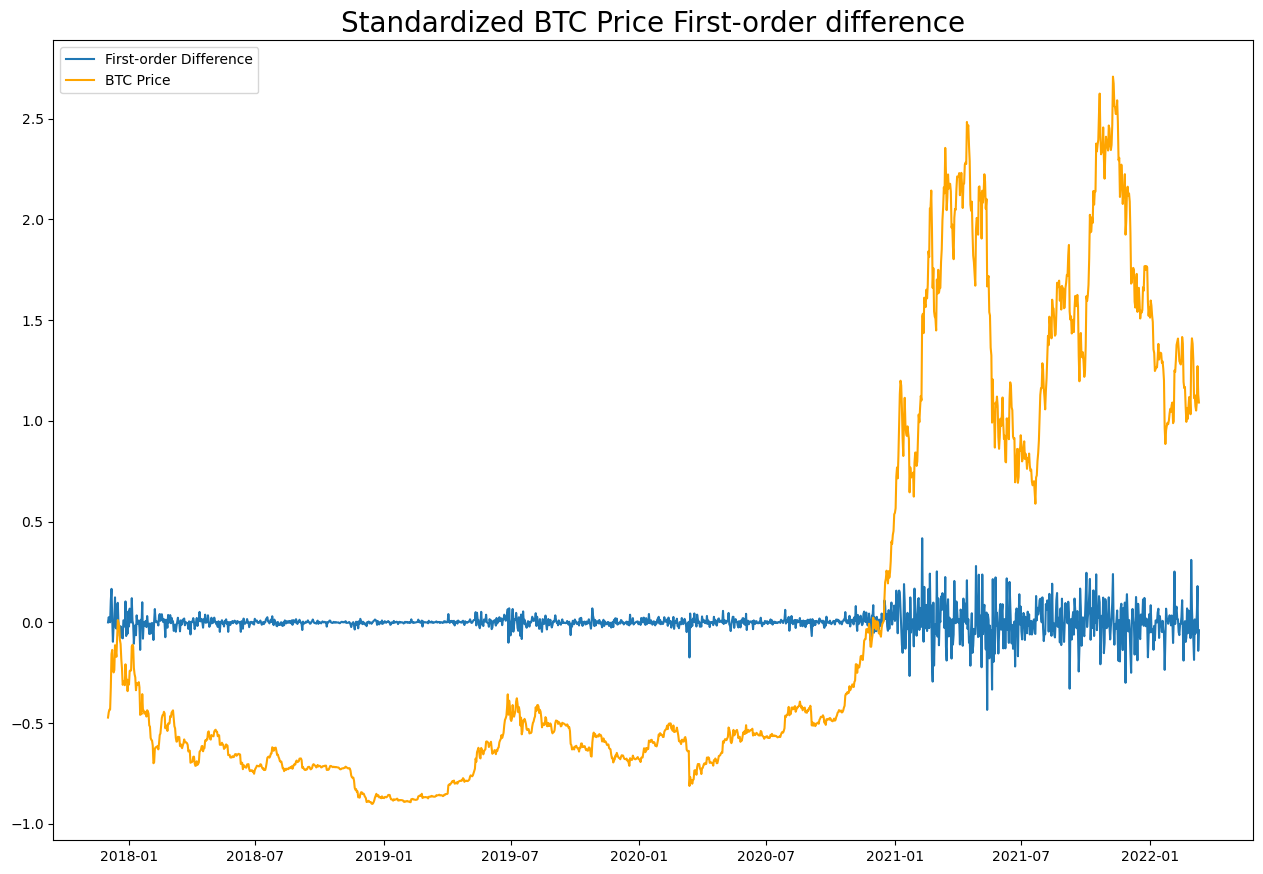

In [32]:
normalized_dfnew['Diff'] = normalized_dfnew['BTC_Price_USD'].diff(periods=1)
normalized_dfnew = normalized_dfnew.dropna()
fig = plt.figure(figsize=(12,8),dpi=100)
axes1 = fig.add_axes([0, 0, 1, 1])
plt.title('Standardized BTC Price First-order difference', size=20)
plt.plot(normalized_dfnew['Diff'], label='First-order Difference')
plt.plot(normalized_dfnew['BTC_Price_USD'], label='BTC Price', color='orange')
plt.legend();

<Figure size 1200x800 with 0 Axes>

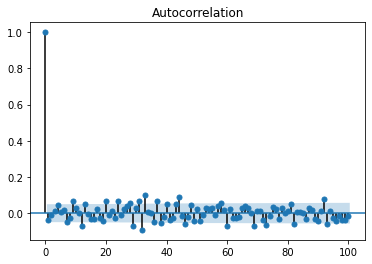

In [33]:
# The trend, mean and variance shouldn't change overtime for stationarity. First order difference does the job partially so far
from statsmodels.graphics.tsaplots import plot_acf
fig = plt.figure(figsize=(12,8),dpi=100)
plot_acf(normalized_dfnew['Diff'],lags = 100)
plt.show()

(0.25, -0.25)

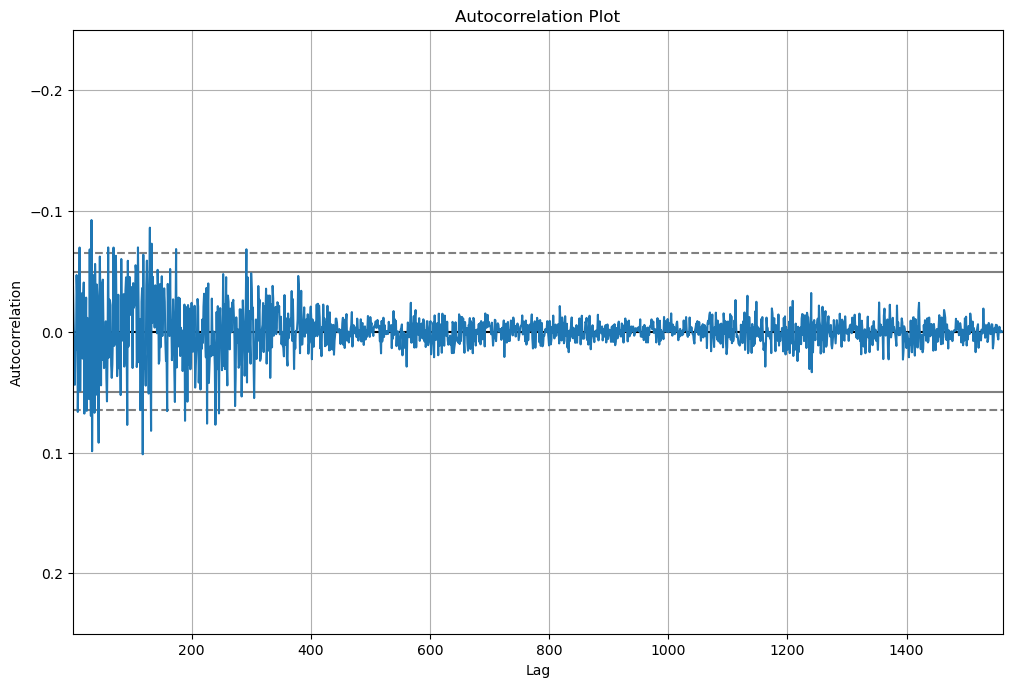

In [34]:
# Most points lagged uptill 100 days are not statistically significant so far, lets streatch the lag further
fig = plt.figure(figsize=(12,8),dpi=100)

pd.plotting.autocorrelation_plot(normalized_dfnew['Diff'])
plt.title('Autocorrelation Plot')
plt.ylim(0.25,-0.25)

**So autocorrelation is not an issue for our dataset i.e. error terms are not correlated, but there is still the issue of multicollinearity due to which highly correlated predictors will show high variance and opposite signs to what should be expected. We also need to choose the best features which affect bitcoin price the most. Model shrinkage methods i.e. regularization with sci-kit learn and subset selection will help us in this matter to get the most significant features and whether a polynomial form of our features along with interactions are relevant.**

# Multiple Regression with Scikit-Learn

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [36]:
# fitting simple linear regression
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)
model = LinearRegression()
model.fit(X_train,y_train)
test_predictions = model.predict(X_test)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)
RMSE

0.049305950713611726

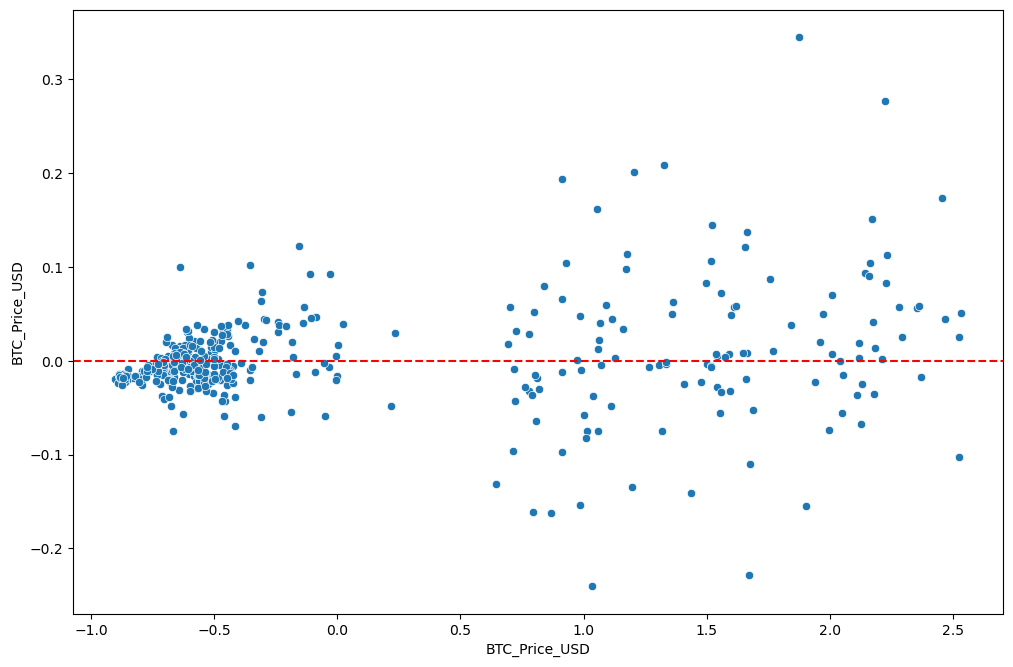

In [115]:
#checking residuals
fig = plt.figure(figsize=(12,8),dpi=100)
test_res = y_test - test_predictions
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

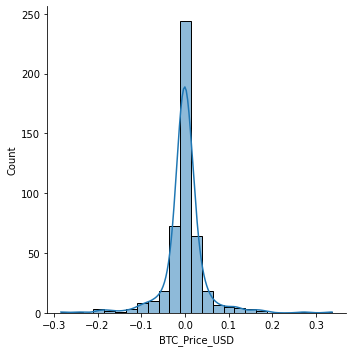

In [38]:
# the residuals initially are close to 0 but increase with time due to high voaltility of BTC price since last year
sns.displot(test_res,bins=25,kde=True)

In [39]:
#Most residulas amount to 0, following a normal distribution our assumptions for a linear model are valid
model.coef_
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
const,0.000000
Trade_Vol_USD,-0.000227
Difficulty,0.009968
HashRate,-0.010325
Transaction_Vol,0.000895
Transactions_per_block,-0.008468
Total_Transactions,0.013501
Market_Capitalization_USD,0.987760
NASDAQ-100,-0.159641
S&P 500,0.160711


**lets see if the model improves using polynomial/interaction terms.**

In [40]:
from sklearn.preprocessing import PolynomialFeatures

In [41]:
# TRAINING ERROR PER DEGREE
train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []

for d in range(1,6):
    
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, Y, test_size=0.3, random_state=101)
    
    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calculate Errors
    
    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Append errors to lists for plotting later
    
   
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

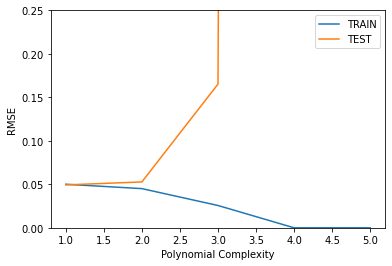

In [42]:
plt.plot(range(1,6),train_rmse_errors[::],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[::],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.ylim(0,0.25)
plt.legend()

**So no polynomial/interaction terms of any order were successful in improving the model as test RMSE increases with increasing polynomial complexity. Finally lets shrink the model with elastic net regularization converging to a full lasso model to see which features "actually" matter**

In [43]:
import itertools
from sklearn.linear_model import ElasticNetCV

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],eps = 0.01,n_alphas=100,max_iter=100000,tol=0.01)
elastic_model.fit(X_train,y_train)
test_predictions = elastic_model.predict(X_test)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)
RMSE

0.05091439147465391

In [114]:
# so a little bit of loss in RMSE
coeff_df = pd.DataFrame(elastic_model.coef_,X.columns,columns=['Coefficient'])
coeff_df.sort_values(by = ['Coefficient'])

,Coefficient
const,0.000000
Trade_Vol_USD,0.000000
Difficulty,-0.000000
HashRate,-0.000000
Transaction_Vol,0.000000
Transactions_per_block,-0.000000
Gold & Silver,0.000000
S&P 500,0.001026
Oil,0.001936
NASDAQ-100,0.003351


In [116]:
elastic_model2 = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],eps = 0.01,n_alphas=100,max_iter=100000,tol=0.01)
elastic_model2.fit(X,Y)
coeff_df = pd.DataFrame(elastic_model2.coef_,X.columns,columns=['Coefficient'])
coeff_df.sort_values(by = ['Coefficient'])

,Coefficient
const,0.000000
Trade_Vol_USD,0.000000
Difficulty,-0.000000
HashRate,-0.000000
Transaction_Vol,0.000000
Transactions_per_block,-0.000000
Gold & Silver,0.000000
Oil,0.001688
S&P 500,0.002017
NASDAQ-100,0.003551


**So we can see that the most significant features in descending order are Market Capitalization, Interest Index and Total Transactions. All other values are very close to 0 (even our last two features). Lets do a forward selection stepwise regression to avoid multicollinearity between our predictors (difficulty and hashrate, S&P-500 and NASDAQ-100).** 

In [49]:
elastic_model2.l1_ratio_  

1.0

In [50]:
#So complete lasso regression was applied, thus the coefficients are 0
#function for forward selection stepwise-regression
def forward_regression(X, y,
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    initial_list = []
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            # Change argmin -> idxmin
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {} with p-value {}'.format(best_feature, best_pval))

        if not changed:
            break

    return included

def backward_regression(X, y,
                           initial_list=[], 
                           threshold_in=0.01, 
                           threshold_out = 0.05, 
                           verbose=True):
    
    included=list(X.columns)
    while True:
        changed=False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {} with p-value {}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


In [117]:
forward_regression(X,Y)

<ipython-input-50-8ff692a1e559>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  S&P 500 with p-value 0.0
Add  Market_Capitalization_USD with p-value 0.0
Add  Interest_Index with p-value 4.113765387120784e-20
Add  NASDAQ-100 with p-value 9.116490129365658e-08
Add  Total_Transactions with p-value 4.972464773918214e-05
Add  Transactions_per_block with p-value 6.455052810198238e-07


['S&P 500',
 'Market_Capitalization_USD',
 'Interest_Index',
 'NASDAQ-100',
 'Total_Transactions',
 'Transactions_per_block']

**So this process selected an extra transactions per block feature, all others are almost the same as our elastic net regularization result. But this method uses the p-values to select a feature. lets use AIC, BIC Mallows Cp, and R^2 cost functions to select the best subset of features as a comparison**

In [71]:
k = 13 #total number of predictors
remaining_features = list(X.columns.values)
features = []
RSS_list, R_squared_list = [np.inf], [np.inf] #Due to 1 indexing of the loop...
features_list = dict()

for i in range(1,k+1):
    best_RSS = np.inf
    
    for combo in itertools.combinations(remaining_features,1):

            RSS = fit_linear_reg(X[list(combo) + features],Y)   #Store temp result 

            if RSS[0] < best_RSS:
                best_RSS = RSS[0]
                best_R_squared = RSS[1] 
                best_feature = combo[0]

    #Updating variables for next loop
    features.append(best_feature)
    remaining_features.remove(best_feature)
    
    #Saving values for plotting
    RSS_list.append(best_RSS)
    R_squared_list.append(best_R_squared)
    features_list[i] = features.copy()


In [75]:
df1 = pd.concat([pd.DataFrame({'features':features_list}),pd.DataFrame({'RSS':RSS_list, 'R_squared': R_squared_list})], axis=1, join='inner')
df1['numb_features'] = df1.index

In [77]:
#Initializing useful variables
m = len(Y)
p = 11
hat_sigma_squared = (1/(m - p -1)) * min(df1['RSS'])

#Computing
df1['C_p'] = (1/m) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['AIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['BIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] +  np.log(m) * df1['numb_features'] * hat_sigma_squared )
df1['R_squared_adj'] = 1 - ( (1 - df1['R_squared'])*(m-1)/(m-df1['numb_features'] -1))
df1

,features,RSS,R_squared,numb_features,C_p,AIC,BIC,R_squared_adj
1,[Market_Capitalization_USD],4.398079,0.997184,1,0.002817,1.129752,1.133178,0.997183
2,"[Market_Capitalization_USD, Interest_Index]",4.083571,0.997386,2,0.002619,1.050334,1.057185,0.997382
3,"[Market_Capitalization_USD, Interest_Index, Ha...",4.009412,0.997433,3,0.002575,1.032586,1.042863,0.997428
4,"[Market_Capitalization_USD, Interest_Index, Ha...",3.974402,0.997456,4,0.002556,1.024882,1.038585,0.997449
5,"[Market_Capitalization_USD, Interest_Index, Ha...",3.926584,0.997486,5,0.002528,1.013893,1.031021,0.997478
6,"[Market_Capitalization_USD, Interest_Index, Ha...",3.917429,0.997492,6,0.002525,1.012823,1.033377,0.997482
7,"[Market_Capitalization_USD, Interest_Index, Ha...",3.884854,0.997513,7,0.002508,1.005745,1.029724,0.997502
8,"[Market_Capitalization_USD, Interest_Index, Ha...",3.879149,0.997517,8,0.002507,1.005560,1.032966,0.997504
9,"[Market_Capitalization_USD, Interest_Index, Ha...",3.872449,0.997521,9,0.002506,1.005121,1.035952,0.997506
10,"[Market_Capitalization_USD, Interest_Index, Ha...",3.868737,0.997523,10,0.002507,1.005448,1.039705,0.997507


In [98]:
df1.loc[4]['features']# We can see the same trend of selection as our previous shrinkage and model selection methods

['Market_Capitalization_USD',
 'Interest_Index',
 'HashRate',
 'Total_Transactions']

In [88]:
df1.loc[9]['features']

['Market_Capitalization_USD',
 'Interest_Index',
 'HashRate',
 'Total_Transactions',
 'Transactions_per_block',
 'S&P 500',
 'NASDAQ-100',
 'Transaction_Vol',
 'Difficulty']

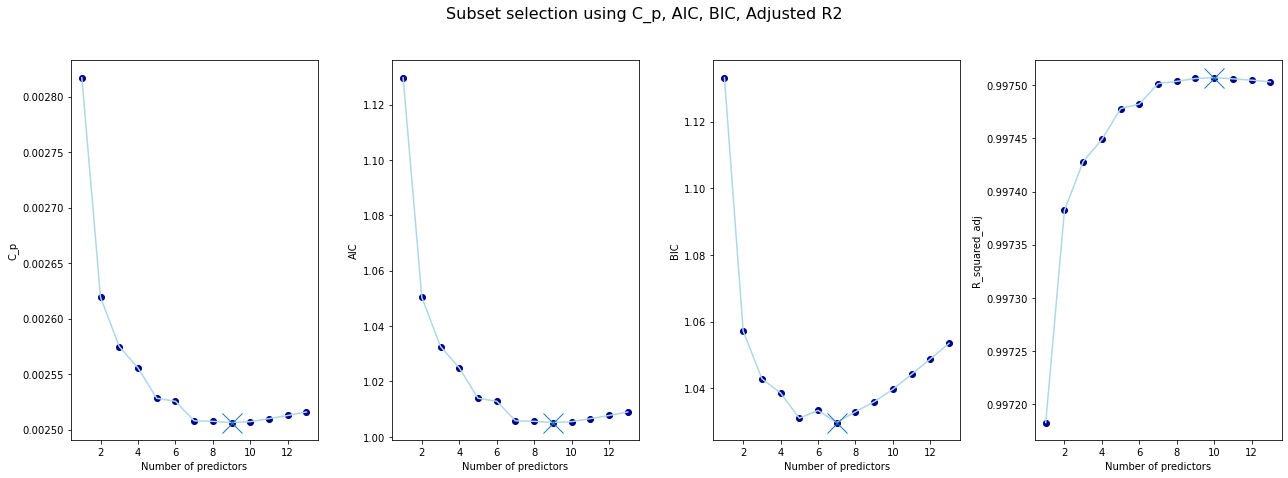

In [97]:
variables = ['C_p', 'AIC','BIC','R_squared_adj']
fig = plt.figure(figsize = (18,6))

for i,v in enumerate(variables):
    ax = fig.add_subplot(1, 4, i+1)
    ax.plot(df1['numb_features'],df1[v], color = 'lightblue')
    ax.scatter(df1['numb_features'],df1[v], color = 'darkblue')
    if v == 'R_squared_adj':
        ax.plot(df1[v].idxmax(),df1[v].max(), marker = 'x', markersize = 20)
    else:
        ax.plot(df1[v].idxmin(),df1[v].min(), marker = 'x', markersize = 20)
    ax.set_xlabel('Number of predictors')
    ax.set_ylabel(v)

fig.suptitle('Subset selection using C_p, AIC, BIC, Adjusted R2', fontsize = 16,y=1.1)
plt.tight_layout()
plt.show()

### To conclude, it can be inferred from our model, that apart from total market capitalization of bitcoin which obviously is a function of bitcoin price, the interest index by google trends and daily number of total transactions of bitcoin highly affect its price. This might not be surprising, but what is really interesting is that bitcoin valuation is more affected by **tech stocks** valuation especifically the NASDAQ-100 compared to the S&P-500 (This is something new for me) due to the higher coefficient value after performing elastic net regression.

### What will follow after this in the future is a full time series analysis to forcast BTC price and a twitter sentiment analysis of how it affects BTC price. Stay tuned!